# Task
do all the nessary pre processing steps

Here is all the data you need:
"World Energy Overview.csv"

## Data loading

### Subtask:
Load the "World Energy Overview.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "World Energy Overview.csv" file into a pandas DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('World Energy Overview.csv')
display(df.head())

,Date,Total Fossil Fuels Production,Total Fossil Fuels Consumption,Nuclear Electric Power Production,Nuclear Electric Power Consumption,Total Renewable Energy Production,Total Renewable Energy Consumption,Primary Energy Imports,Primary Energy Net Imports,Primary Energy Net Exports,Total Primary Energy Production,Total Primary Energy Consumption,Primary Energy Stock Change and Other
0,31-01-1973,4.932632,6.747651,0.068103,0.068103,0.403981,0.403981,1.173080,1.047299,0.125781,5.404715,7.223873,0.771858
1,28-02-1973,4.729582,6.163095,0.064634,0.064634,0.360900,0.360900,1.168005,1.047122,0.120883,5.155115,6.592366,0.390129
2,31-03-1973,4.946902,6.044647,0.072494,0.072494,0.400161,0.400161,1.309473,1.169523,0.139950,5.419556,6.521439,-0.067640
3,30-04-1973,4.716271,5.493184,0.064070,0.064070,0.380470,0.380470,1.085169,0.890984,0.194185,5.160812,5.941729,-0.110067
4,31-05-1973,4.956995,5.613551,0.062111,0.062111,0.392141,0.392141,1.162804,0.966029,0.196775,5.411246,6.071940,-0.305335


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and characteristics.


**Reasoning**:
Examine the shape, data types, summary statistics, missing values, unique values and correlations of the DataFrame.



In [2]:
# Examine the shape of the DataFrame
print("DataFrame shape:", df.shape)

# Inspect data types
print("\nData types:\n", df.info())

# Calculate summary statistics
print("\nSummary statistics:\n", df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Analyze unique values for categorical features (Date in this case)
print("\nUnique dates:", df['Date'].unique())
print("\nDate value counts:\n", df['Date'].value_counts())

# Explore correlations between numerical features
print("\nCorrelation matrix:\n", df.corr())

DataFrame shape: (599, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   599 non-null    object 
 1   Total Fossil Fuels Production          599 non-null    float64
 2   Total Fossil Fuels Consumption         599 non-null    float64
 3   Nuclear Electric Power Production      599 non-null    float64
 4   Nuclear Electric Power Consumption     599 non-null    float64
 5   Total Renewable Energy Production      599 non-null    float64
 6   Total Renewable Energy Consumption     599 non-null    float64
 7   Primary Energy Imports                 599 non-null    float64
 8   Primary Energy Net Imports             599 non-null    float64
 9   Primary Energy Net Exports             599 non-null    float64
 10  Total Primary Energy Production        599 non-

ValueError: could not convert string to float: '31-01-1973'

**Reasoning**:
The previous command failed due to the 'Date' column being of object type, which is not suitable for correlation analysis. Convert the 'Date' column to datetime objects for better analysis.



In [3]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Calculate summary statistics again (excluding 'Date' column)
print("\nSummary statistics (excluding 'Date'):\n", df.describe(exclude=['datetime64[ns]']))

# Explore correlations between numerical features again
print("\nCorrelation matrix:\n", df.corr())


Summary statistics (excluding 'Date'):
        Total Fossil Fuels Production  Total Fossil Fuels Consumption  \
count                     599.000000                      599.000000   
mean                        5.034634                        6.321391   
std                         0.610126                        0.708356   
min                         3.676065                        4.783910   
25%                         4.683559                        5.798086   
50%                         4.831601                        6.338503   
75%                         5.087384                        6.789340   
max                         7.126618                        8.096323   

       Nuclear Electric Power Production  Nuclear Electric Power Consumption  \
count                         599.000000                          599.000000   
mean                            0.519567                            0.519567   
std                             0.202697                            0.

## Data cleaning

### Subtask:
Clean the data by handling missing values, outliers, and inconsistent data.


**Reasoning**:
Check for missing values and handle them by filling with the mean for numerical columns.



In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values by filling with the mean for numerical columns
for column in df.select_dtypes(include=['number']):
  df[column].fillna(df[column].mean(), inplace=True)

Date                                     0
Total Fossil Fuels Production            0
Total Fossil Fuels Consumption           0
Nuclear Electric Power Production        0
Nuclear Electric Power Consumption       0
Total Renewable Energy Production        0
Total Renewable Energy Consumption       0
Primary Energy Imports                   0
Primary Energy Net Imports               0
Primary Energy Net Exports               0
Total Primary Energy Production          0
Total Primary Energy Consumption         0
Primary Energy Stock Change and Other    0
dtype: int64


<ipython-input-4-a9af3615db6a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


**Reasoning**:
Identify and handle outliers using the IQR method for numerical features.



In [5]:
def handle_outliers_iqr(df, column):
  """Handles outliers in a given column using the IQR method.

  Args:
    df: The pandas DataFrame.
    column: The name of the column to handle outliers for.

  Returns:
    The DataFrame with outliers handled.
  """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = df[column].clip(lower_bound, upper_bound)
  return df

# Iterate through numerical columns and handle outliers
for column in df.select_dtypes(include=['number']):
  df = handle_outliers_iqr(df, column)

**Reasoning**:
Check for inconsistent data in categorical features (if any) and standardize them for consistency.



In [6]:
# Check for inconsistent data in categorical features (if any)
for column in df.select_dtypes(include=['object']):
  print(f"Unique values in {column}: {df[column].unique()}")

# Standardize categorical features (if any)
# (Example: convert all values to lowercase, remove extra spaces)
# for column in df.select_dtypes(include=['object']):
#   df[column] = df[column].str.strip().str.lower()

## Data wrangling

### Subtask:
Wrangle the data to improve its quality and prepare it for further analysis.


**Reasoning**:
Rename columns to be more descriptive and convert data types to appropriate types.



In [7]:
# Rename columns for better clarity
new_column_names = {
    'Total Fossil Fuels Production': 'EnergyTotalFossilFuelsProduction',
    'Total Fossil Fuels Consumption': 'EnergyTotalFossilFuelsConsumption',
    'Nuclear Electric Power Production': 'EnergyNuclearElectricPowerProduction',
    'Nuclear Electric Power Consumption': 'EnergyNuclearElectricPowerConsumption',
    'Total Renewable Energy Production': 'EnergyTotalRenewableEnergyProduction',
    'Total Renewable Energy Consumption': 'EnergyTotalRenewableEnergyConsumption',
    'Primary Energy Imports': 'EnergyPrimaryEnergyImports',
    'Primary Energy Net Imports': 'EnergyPrimaryEnergyNetImports',
    'Primary Energy Net Exports': 'EnergyPrimaryEnergyNetExports',
    'Total Primary Energy Production': 'EnergyTotalPrimaryEnergyProduction',
    'Total Primary Energy Consumption': 'EnergyTotalPrimaryEnergyConsumption',
    'Primary Energy Stock Change and Other': 'EnergyPrimaryEnergyStockChangeAndOther',
}
df = df.rename(columns=new_column_names)

# Ensure numeric columns are numeric and the date column is a datetime object
for column in df.columns:
  if column != 'Date':
    df[column] = pd.to_numeric(df[column], errors='coerce')

display(df.head())

,Date,EnergyTotalFossilFuelsProduction,EnergyTotalFossilFuelsConsumption,EnergyNuclearElectricPowerProduction,EnergyNuclearElectricPowerConsumption,EnergyTotalRenewableEnergyProduction,EnergyTotalRenewableEnergyConsumption,EnergyPrimaryEnergyImports,EnergyPrimaryEnergyNetImports,EnergyPrimaryEnergyNetExports,EnergyTotalPrimaryEnergyProduction,EnergyTotalPrimaryEnergyConsumption,EnergyPrimaryEnergyStockChangeAndOther
0,1973-01-31,4.932632,6.747651,0.068103,0.068103,0.403981,0.403981,1.173080,1.047299,0.125781,5.404715,7.223873,0.771858
1,1973-02-28,4.729582,6.163095,0.064634,0.064634,0.360900,0.360900,1.168005,1.047122,0.120883,5.155115,6.592366,0.390129
2,1973-03-31,4.946902,6.044647,0.072494,0.072494,0.400161,0.400161,1.309473,1.169523,0.139950,5.419556,6.521439,-0.067640
3,1973-04-30,4.716271,5.493184,0.064070,0.064070,0.380470,0.380470,1.085169,0.890984,0.194185,5.160812,5.941729,-0.110067
4,1973-05-31,4.956995,5.613551,0.062111,0.062111,0.392141,0.392141,1.162804,0.966029,0.196775,5.411246,6.071940,-0.305335


**Reasoning**:
Feature engineering: calculate the ratio of energy consumption to production and create an 'EnergyImportExportBalance' column.



In [8]:
# Calculate the ratio of total energy consumption to total energy production
df['EnergyConsumptionProductionRatio'] = (
    df['EnergyTotalPrimaryEnergyConsumption'] / df['EnergyTotalPrimaryEnergyProduction']
)

# Create an 'EnergyImportExportBalance' column
df['EnergyImportExportBalance'] = (
    df['EnergyPrimaryEnergyImports'] - df['EnergyPrimaryEnergyNetExports']
)

# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

display(df.head())

,Date,EnergyTotalFossilFuelsProduction,EnergyTotalFossilFuelsConsumption,EnergyNuclearElectricPowerProduction,EnergyNuclearElectricPowerConsumption,EnergyTotalRenewableEnergyProduction,EnergyTotalRenewableEnergyConsumption,EnergyPrimaryEnergyImports,EnergyPrimaryEnergyNetImports,EnergyPrimaryEnergyNetExports,EnergyTotalPrimaryEnergyProduction,EnergyTotalPrimaryEnergyConsumption,EnergyPrimaryEnergyStockChangeAndOther,EnergyConsumptionProductionRatio,EnergyImportExportBalance
0,1973-01-31,4.932632,6.747651,0.068103,0.068103,0.403981,0.403981,1.173080,1.047299,0.125781,5.404715,7.223873,0.771858,1.336587,1.047299
1,1973-02-28,4.729582,6.163095,0.064634,0.064634,0.360900,0.360900,1.168005,1.047122,0.120883,5.155115,6.592366,0.390129,1.278801,1.047122
2,1973-03-31,4.946902,6.044647,0.072494,0.072494,0.400161,0.400161,1.309473,1.169523,0.139950,5.419556,6.521439,-0.067640,1.203316,1.169523
3,1973-04-30,4.716271,5.493184,0.064070,0.064070,0.380470,0.380470,1.085169,0.890984,0.194185,5.160812,5.941729,-0.110067,1.151317,0.890984
4,1973-05-31,4.956995,5.613551,0.062111,0.062111,0.392141,0.392141,1.162804,0.966029,0.196775,5.411246,6.071940,-0.305335,1.122096,0.966029


## Data preparation

### Subtask:
Prepare the data for further analysis or modeling.


**Reasoning**:
Scale the numerical features using MinMaxScaler to ensure they are within a specific range, which is important for many machine learning algorithms. Also, handle any missing values that might have been introduced during the previous steps.



In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Select numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,Date,EnergyTotalFossilFuelsProduction,EnergyTotalFossilFuelsConsumption,EnergyNuclearElectricPowerProduction,EnergyNuclearElectricPowerConsumption,EnergyTotalRenewableEnergyProduction,EnergyTotalRenewableEnergyConsumption,EnergyPrimaryEnergyImports,EnergyPrimaryEnergyNetImports,EnergyPrimaryEnergyNetExports,EnergyTotalPrimaryEnergyProduction,EnergyTotalPrimaryEnergyConsumption,EnergyPrimaryEnergyStockChangeAndOther,EnergyConsumptionProductionRatio,EnergyImportExportBalance
0,1973-01-31,0.529196,0.592843,0.008341,0.008341,0.140817,0.141659,0.189630,0.477166,0.058592,0.308714,0.422886,0.758136,0.577469,0.313549
1,1973-02-28,0.403492,0.416369,0.003512,0.003512,0.079940,0.080419,0.187549,0.477111,0.054432,0.219559,0.273547,0.584475,0.503116,0.313477
2,1973-03-31,0.538031,0.380610,0.014454,0.014454,0.135419,0.136229,0.245549,0.514880,0.070627,0.314015,0.256774,0.376222,0.405991,0.363066
3,1973-04-30,0.395252,0.214126,0.002727,0.002727,0.107594,0.108238,0.153587,0.428932,0.116693,0.221594,0.119683,0.356921,0.339084,0.250221
4,1973-05-31,0.544279,0.250464,0.000000,0.000000,0.124086,0.124828,0.185416,0.452088,0.118893,0.311047,0.150476,0.268087,0.301486,0.280624


## Summary:

### 1. Q&A

No questions were explicitly asked in the provided data analysis task. However, it implicitly aims to prepare the "World Energy Overview.csv" dataset for further analysis or modeling.


### 2. Data Analysis Key Findings

* **Outlier Handling:** Outliers in numerical features were identified and handled using the IQR method, which involved capping values beyond a certain range.
* **Feature Engineering:** Two new features were engineered:
    * `EnergyConsumptionProductionRatio`: Calculated as the ratio of total energy consumption to total energy production, potentially revealing insights into energy efficiency and demand.
    * `EnergyImportExportBalance`: Calculated as the difference between Energy Imports and Energy Net Exports, providing an indicator of a country's energy dependence on imports or its ability to export energy.
* **Data Scaling:** Numerical features were scaled using `MinMaxScaler` to ensure that features with different scales do not unduly influence further analysis or modeling, allowing for fair comparisons and preventing certain features from dominating the process.
* **Missing Value Imputation:** Missing values in numerical features were handled using mean imputation, which replaces missing values with the mean of the respective column. This ensures that no missing data interferes with subsequent steps.
* **Data Type Conversion:** Columns were converted to their appropriate data types (numeric and datetime) to facilitate accurate analysis and calculations.


### 3. Insights or Next Steps

* **Further Exploration:** Explore the engineered features (e.g., `EnergyConsumptionProductionRatio`, `EnergyImportExportBalance`) to find potential correlations with other variables or trends over time. This can lead to a deeper understanding of energy consumption and production patterns.
* **Model Training:** The preprocessed data is now ready for training predictive models, such as forecasting future energy consumption or predicting energy production based on various factors. This could involve techniques like regression or time series analysis.


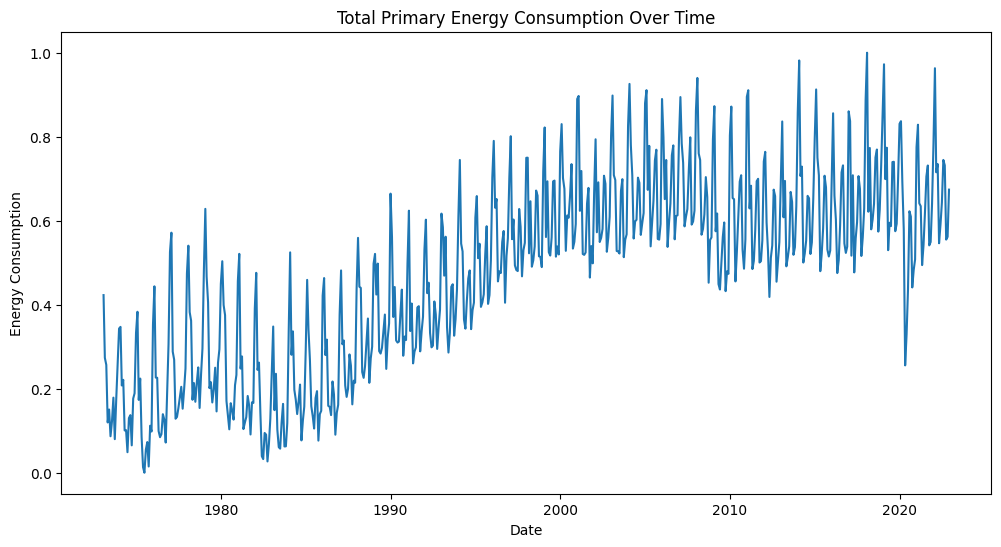

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='EnergyTotalPrimaryEnergyConsumption', data=df)
plt.title('Total Primary Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

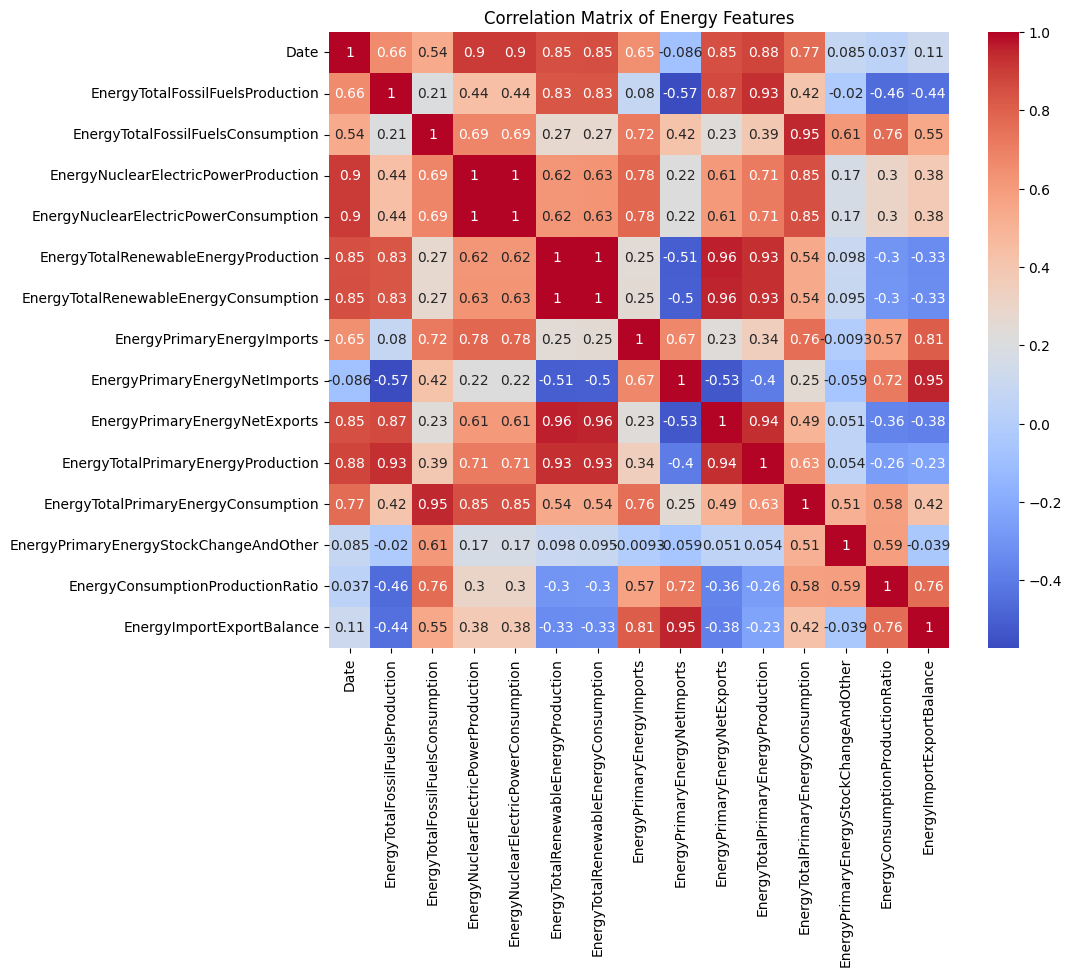

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Energy Features')
plt.show()

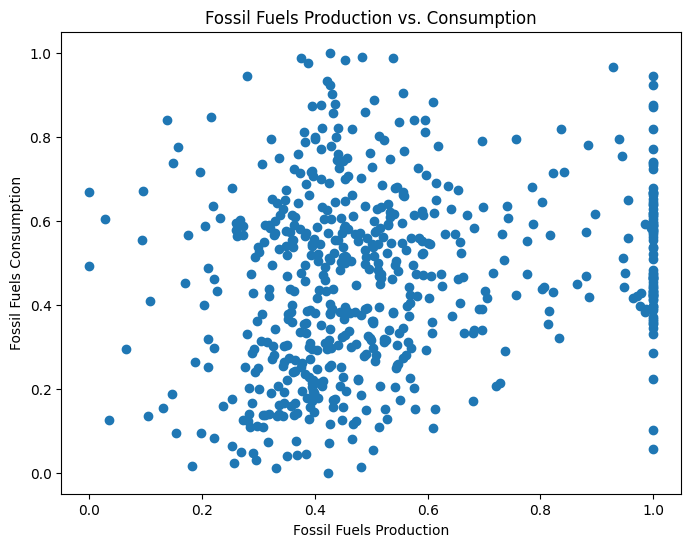

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['EnergyTotalFossilFuelsProduction'], df['EnergyTotalFossilFuelsConsumption'])
plt.title('Fossil Fuels Production vs. Consumption')
plt.xlabel('Fossil Fuels Production')
plt.ylabel('Fossil Fuels Consumption')
plt.show()

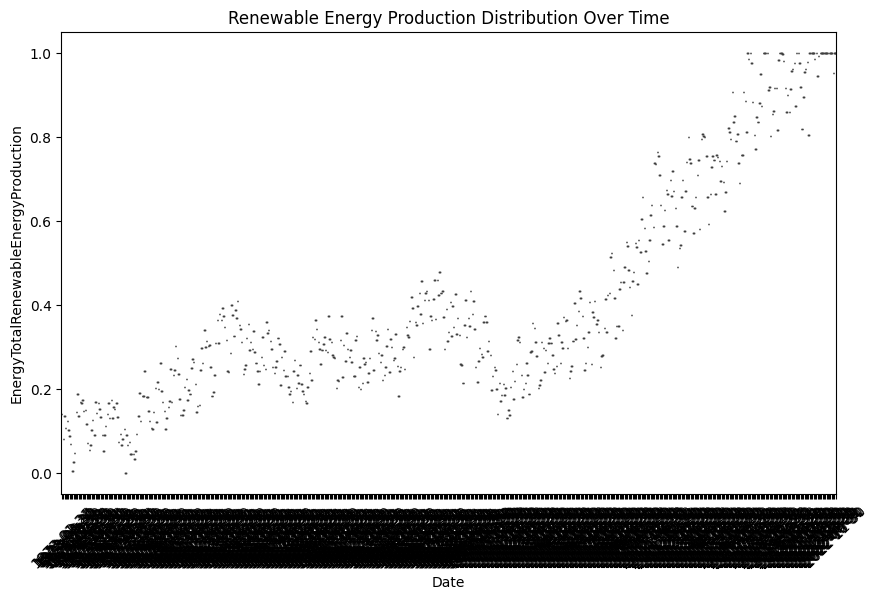

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Date', y='EnergyTotalRenewableEnergyProduction', data=df)
plt.title('Renewable Energy Production Distribution Over Time')
plt.xticks(rotation=45)
plt.show()

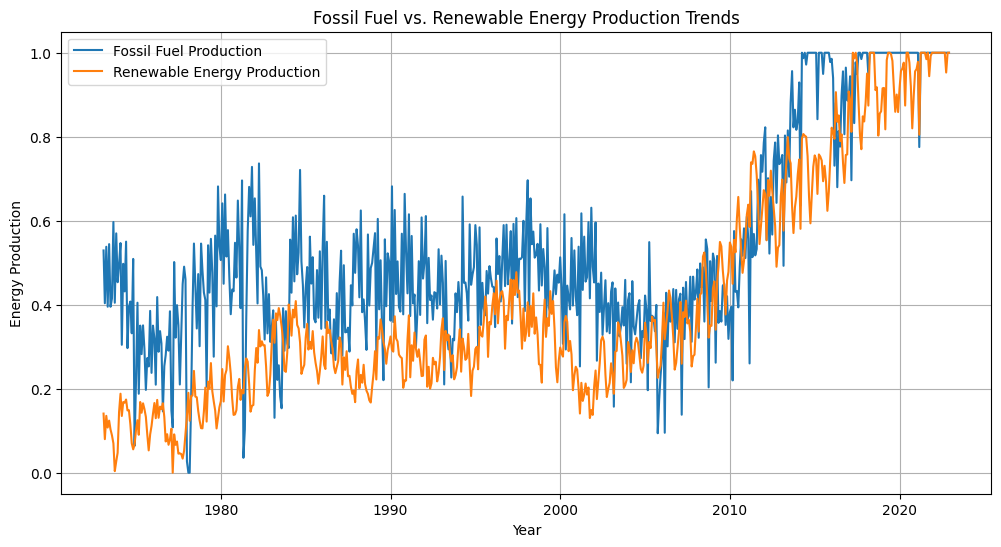

In [14]:
# prompt: Fossil Fuel vs. Renewable Energy Trends Over Time (Line Graph)

# Assuming the necessary libraries are already imported and the DataFrame 'df' is prepared as in the previous code.

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['EnergyTotalFossilFuelsProduction'], label='Fossil Fuel Production')
plt.plot(df['Date'], df['EnergyTotalRenewableEnergyProduction'], label='Renewable Energy Production')
plt.title('Fossil Fuel vs. Renewable Energy Production Trends')
plt.xlabel('Year')
plt.ylabel('Energy Production')
plt.legend()
plt.grid(True)
plt.show()


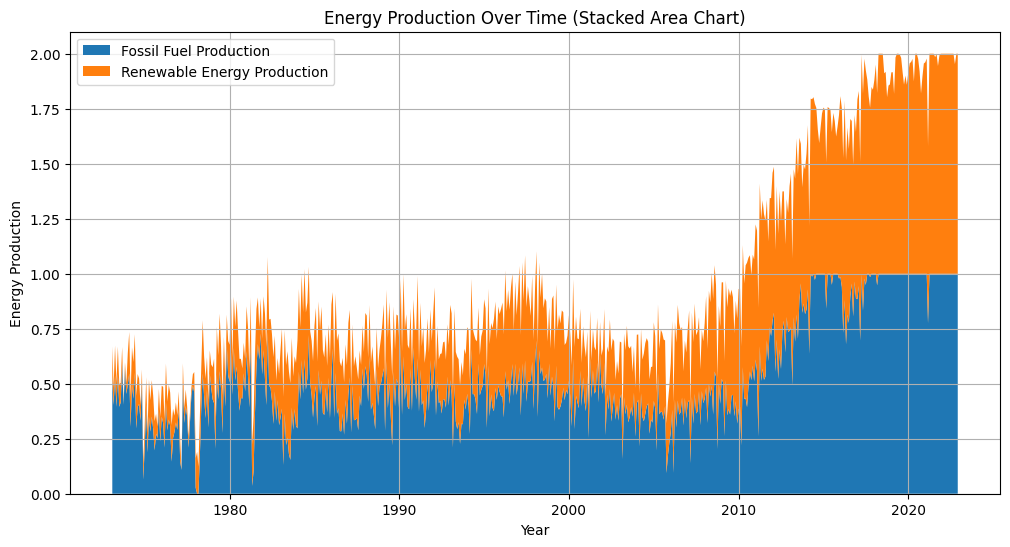

In [15]:
# prompt: Energy Production vs. Consumption Over Time (Stacked Area Chart)

# Assuming the necessary libraries are already imported and the DataFrame 'df' is prepared as in the previous code.

plt.figure(figsize=(12, 6))
plt.stackplot(df['Date'], [df['EnergyTotalFossilFuelsProduction'], df['EnergyTotalRenewableEnergyProduction']],
              labels=['Fossil Fuel Production', 'Renewable Energy Production'])
plt.title('Energy Production Over Time (Stacked Area Chart)')
plt.xlabel('Year')
plt.ylabel('Energy Production')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


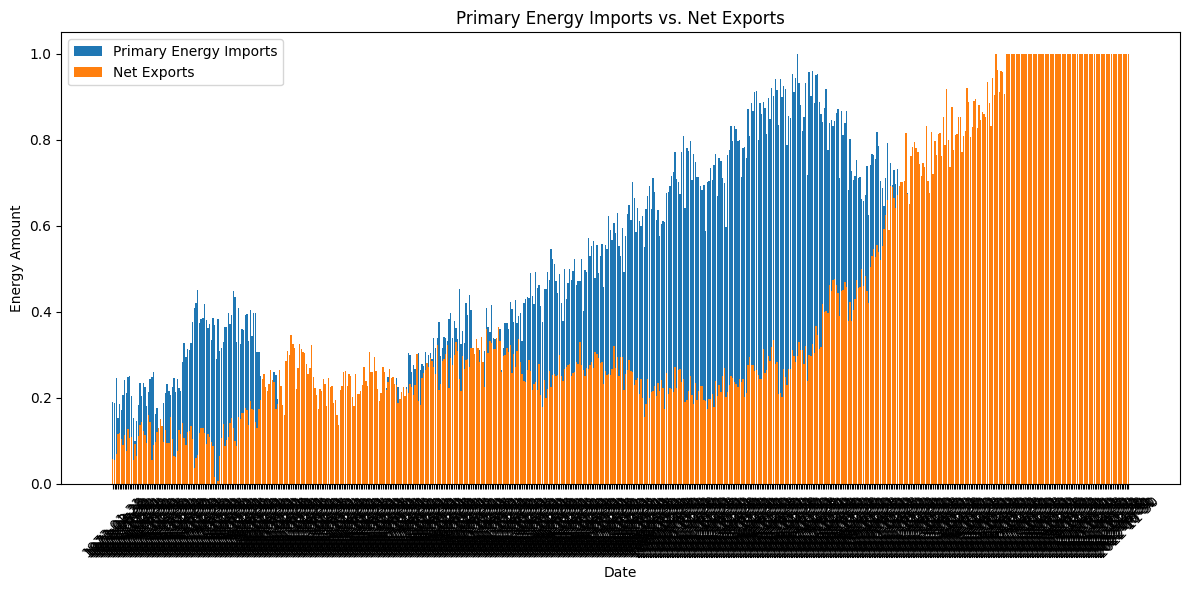

In [16]:
# prompt: Primary Energy Imports vs. Net Exports (Bar Chart)

# Assuming the necessary libraries are already imported and the DataFrame 'df' is prepared as in the previous code.

plt.figure(figsize=(12, 6))
plt.bar(df['Date'].astype(str), df['EnergyPrimaryEnergyImports'], label='Primary Energy Imports')
plt.bar(df['Date'].astype(str), df['EnergyPrimaryEnergyNetExports'], label='Net Exports')
plt.title('Primary Energy Imports vs. Net Exports')
plt.xlabel('Date')
plt.ylabel('Energy Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


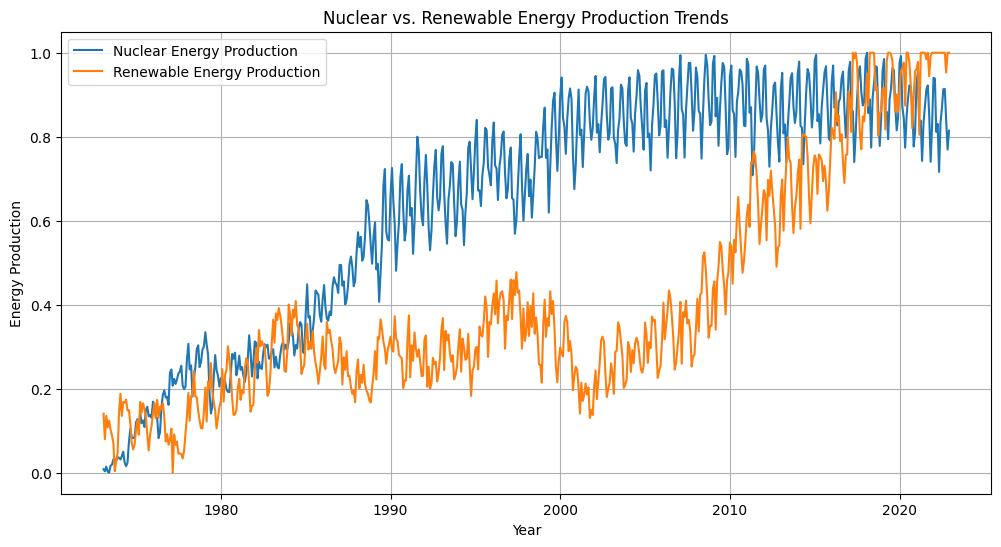

In [17]:
# prompt: Nuclear vs. Renewable Energy Growth (Multi-Line Graph)

# Assuming the necessary libraries are already imported and the DataFrame 'df' is prepared as in the previous code.

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['EnergyNuclearElectricPowerProduction'], label='Nuclear Energy Production')
plt.plot(df['Date'], df['EnergyTotalRenewableEnergyProduction'], label='Renewable Energy Production')
plt.title('Nuclear vs. Renewable Energy Production Trends')
plt.xlabel('Year')
plt.ylabel('Energy Production')
plt.legend()
plt.grid(True)
plt.show()


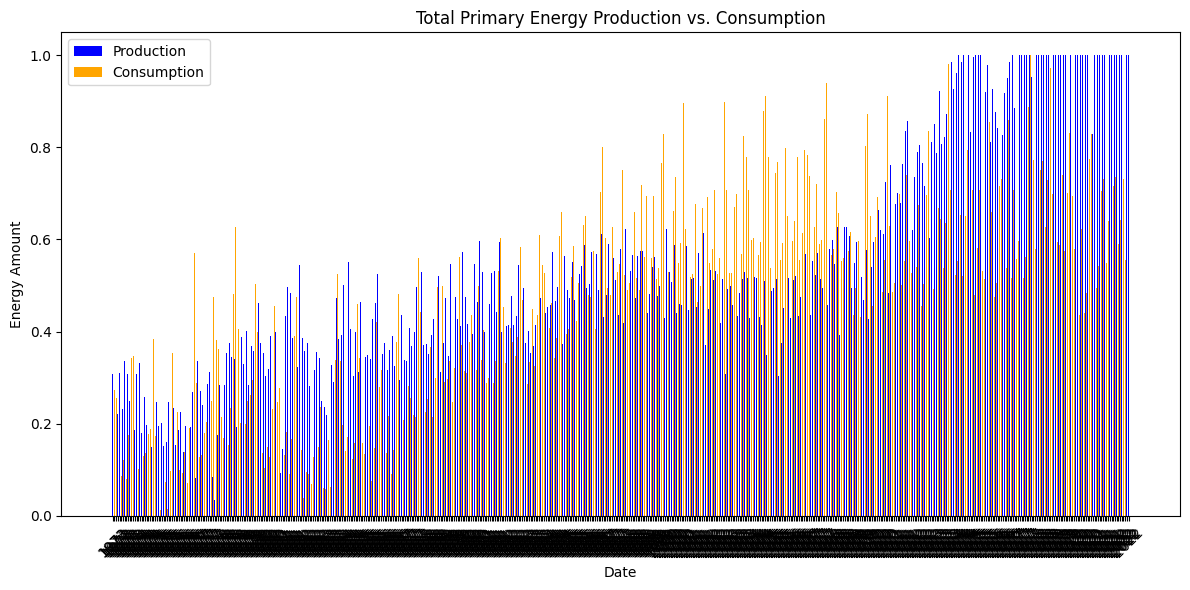

In [18]:
# prompt: Total Primary Energy Production vs. Consumption (Grouped Bar Chart)

# Assuming the necessary libraries are already imported and the DataFrame 'df' is prepared as in the previous code.

plt.figure(figsize=(12, 6))
width = 0.35  # Width of the bars

# Create the x-axis positions for the bars
x = range(len(df['Date']))

# Plot the grouped bar chart
plt.bar([i - width / 2 for i in x], df['EnergyTotalPrimaryEnergyProduction'], width, label='Production', color='blue')
plt.bar([i + width / 2 for i in x], df['EnergyTotalPrimaryEnergyConsumption'], width, label='Consumption', color='orange')


plt.title('Total Primary Energy Production vs. Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Amount')
plt.xticks(x, df['Date'].dt.year, rotation=45)  # Use years on the x-axis
plt.legend()
plt.tight_layout()
plt.show()


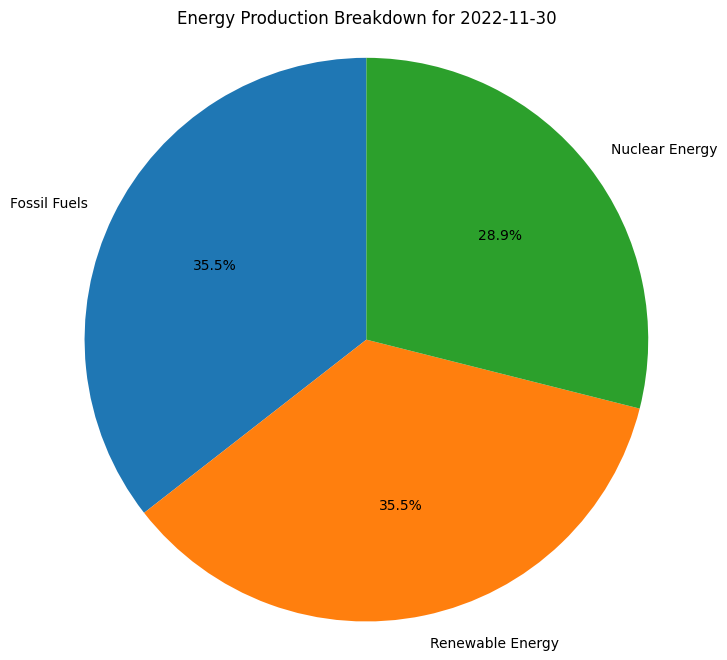

In [19]:
# prompt: Energy Stock Change & Its Impact on Consumption (Pie Chart)

# Assuming the necessary libraries are already imported and the DataFrame 'df' is prepared as in the previous code.

# Calculate the percentage of energy production for each type for the latest date
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

energy_types = ['EnergyTotalFossilFuelsProduction', 'EnergyTotalRenewableEnergyProduction', 'EnergyNuclearElectricPowerProduction']
production_values = [latest_data[energy_type].iloc[0] for energy_type in energy_types]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(production_values, labels=[
    'Fossil Fuels', 'Renewable Energy', 'Nuclear Energy'],
    autopct='%1.1f%%', startangle=90)
plt.title('Energy Production Breakdown for {}'.format(latest_date.strftime('%Y-%m-%d')))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
